In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# 1. Data Inspection and Data Cleaning.

In [2]:
#reading the dataset
ngo=pd.read_csv('Country-data.csv')
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [22]:
data_dict=pd.read_csv('data-dictionary+.csv')
data_dict

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [3]:
#shape of the dataset
ngo.shape

(167, 10)

In [4]:
#data-types of the variables
ngo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


All other variables in the dataframe are either of int or float type other than 'country'.

In [5]:
#Checking missing values
ngo.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There are no null values in the dataframe.

In [6]:
#Columns of the dataframe
ngo_columns=ngo.columns
ngo_columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
#Looking at the basuc stats of the dataframe.
ngo.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [14]:
ngo['country'].unique().shape

(167,)

No country is repeated in the column country.

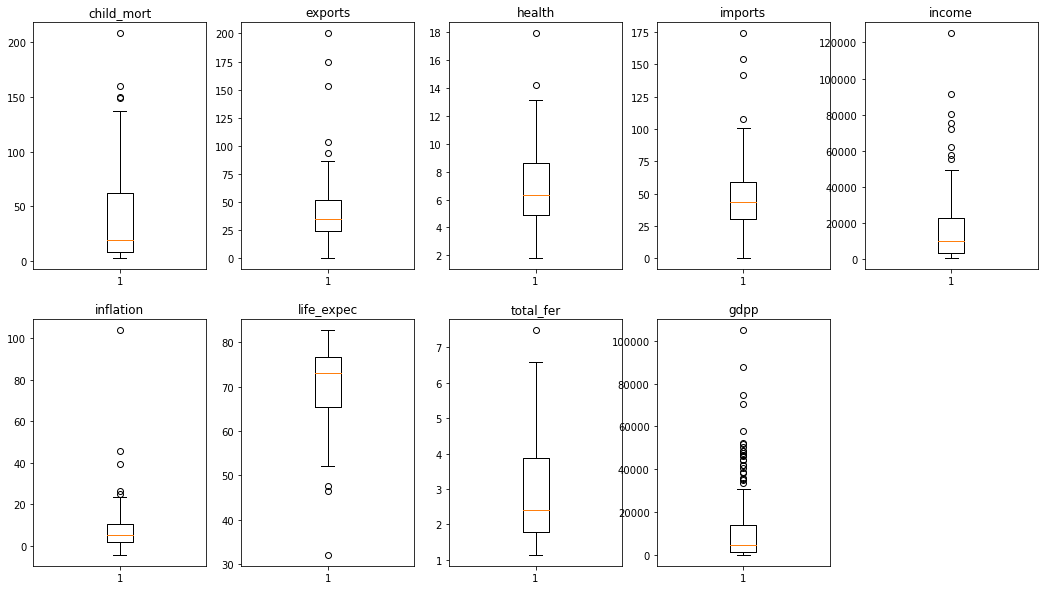

In [8]:
#Visualizing if any outliers.
plt.figure(figsize=(18,10))
j=1
for i in ngo_columns.drop('country'):
    plt.subplot(2,5,j)
    plt.boxplot(ngo[i])
    plt.title(i)
    j+=1
plt.show()

There are visible outliers in gdpp, income, exports and inflation along with very few outliers in other variables.

In [10]:
#Quantifying the outliers
def num_outliers(dataframe):
    q1=dataframe.quantile(0.25)
    q3=dataframe.quantile(0.75)
    iqr=q3-q1
    outlier=((dataframe < (q1 - 1.5 * iqr)) | (dataframe > (q3 + 1.5 * iqr))).sum()
    return outlier
outlier=num_outliers(ngo[ngo_columns.drop('country')])
outlier

child_mort     4
exports        5
health         2
imports        4
income         8
inflation      5
life_expec     3
total_fer      1
gdpp          25
dtype: int64

Outliers can be handled here but since with very few rows, we won't handle them since they can form another cluster.

# 2. Exploratory data analysis:

### 2.1 Univariate Analysis

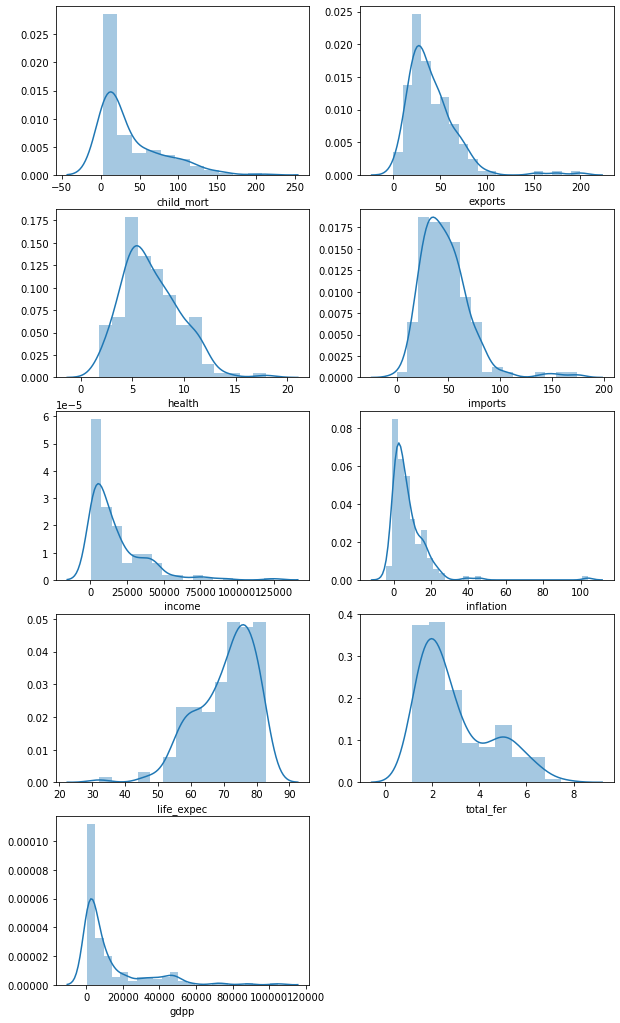

In [21]:
j=1
plt.figure(figsize=(10,18))
for i in ngo[ngo_columns.drop('country')]:
    plt.subplot(5,2,j)
    sns.distplot(ngo[i])
    j=j+1
plt.show()

In [45]:
#Function to determine Country with max and minimum values for different columns
def max_min_col(col):
    dict1={}
    max_country=ngo[ngo[col]==max(ngo[col])].country
    dict1[max_country.iloc[0]]=max(ngo[col])
    min_country=ngo[ngo[col]==min(ngo[col])].country
    dict1[min_country.iloc[0]]=min(ngo[col])
    return dict1

In [50]:
for i in ngo[ngo_columns.drop('country')]:
    my_dict=max_min_col(i)
    print(i, my_dict)

child_mort {'Haiti': 208.0, 'Iceland': 2.6}
exports {'Singapore': 200.0, 'Myanmar': 0.109}
health {'United States': 17.9, 'Qatar': 1.81}
imports {'Singapore': 174.0, 'Myanmar': 0.0659}
income {'Qatar': 125000, 'Congo, Dem. Rep.': 609}
inflation {'Nigeria': 104.0, 'Seychelles': -4.21}
life_expec {'Japan': 82.8, 'Haiti': 32.1}
total_fer {'Niger': 7.49, 'Singapore': 1.15}
gdpp {'Luxembourg': 105000, 'Burundi': 231}


#### Based on the distribution plots, boxplots and describe function applied to the variables:
1. On an average 19 out of 1000 children die before the age of 5. The maximum mortality rate in a country is 208-Haiti and the minimum is Iceland-2.6. Haiti is in pretty bad condition as far as child mortality is considered.
2. On an average exports is 35% of the GDP per capita comprises of exports accross the world. The maximum % is Singapore- 200 which is clearly an outlier(Some other sector must be nullifying this 200% export % in gdp per capita) and the minimum is Myanmar-0.109.
3. On an average Health spending is only 6.32% in gdp per capita accross the world. The maximum % is United States-17.9% and the minimum is Qatar- 1.81%. But as per prior knowledge Qatar is an effluent country.
4. On an average imports contribute only 43% of the gdp per capita accross the world. The maximum % is Singapore- 174 which is clearly an outlier(Some other sector must be nullifying this 174% import % in gdp per capita) and the minimum is Myanmar-0.0659.
5. On an average the net income of a person accross the world is 9960 units. The maximum net income of a person is in Qatar- 125000 which says much about people's financial well being in Qatar and minimum is in Congp- 609 whuch is much less than the 25th percentile. People in Congo Demoocratic Republic are financially miserable.
6. On an average the inflation accross the world is 5.39. 